# 분류 (classification)

+ 머신러닝에서 회귀(regression)과 함께 가장 기본적인 데이타 분석 방법
+ 분류는 데이타가 어느 범주(category)에 해당하는지 판단하는 것이다.


## [1]  다항 분류

In [35]:
# (1) 와인 데이터셋 불러오기
import pandas as pd
import pandas as pd
wine = pd.read_csv('./dataset/wine.csv', header=None)
wine.columns = ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide',
               'total sulfur dioxide','density','pH','sulphates','alcohol','quality',
               'type']
print(wine.shape)
wine.tail()

(6497, 13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [41]:
# (2-1) 품질 데이터 확인
print(wine['quality'].describe())
print(wine['quality'].value_counts())

count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64
quality
6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: count, dtype: int64


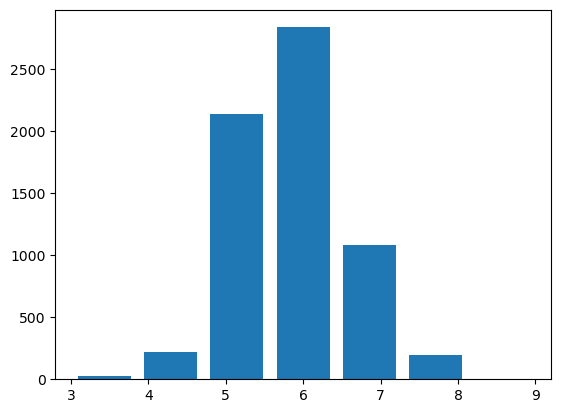

In [43]:
# [확인] 품질 히스토그램 시각화
import matplotlib.pyplot as plt
plt.hist(wine['quality'], bins=7, rwidth=0.8)
plt.show()

In [45]:
# (2-2) 품질을 3개의 범주(좋음, 보통, 나쁨)로 재분류
wine.loc[wine['quality'] <= 5, 'new_quality'] = 0
wine.loc[wine['quality'] == 6, 'new_quality'] = 1
wine.loc[wine['quality'] >= 7, 'new_quality'] = 2

print(wine['new_quality'].describe())
print(wine['new_quality'].value_counts())
# value_counts() : 항목수를 확인하며 어느 항목의 수가 너무 많거나 작으면 분류가 안 될 수 있기에 확인

count    6497.000000
mean        0.829614
std         0.731124
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         2.000000
Name: new_quality, dtype: float64
new_quality
1.0    2836
0.0    2384
2.0    1277
Name: count, dtype: int64


In [47]:
# (3) 데이터 정규화 및 train, test 데이터 분리

import tensorflow as tf

# new_quality 항목으로 대치하고자 quality 항목은 삭제한다.
del wine['quality']


wine_norm = (wine - wine.min()) / (wine.max() - wine.min())
wine_shuffle = wine_norm.sample(frac=1)
wine_np = wine_shuffle.to_numpy()

train_idx = int(len(wine_np) * 0.8)
train_X, train_Y = wine_np[:train_idx, :-1], wine_np[:train_idx, -1]
test_X, test_Y = wine_np[train_idx:, :-1], wine_np[train_idx:, -1]
train_Y = tf.keras.utils.to_categorical(train_Y, num_classes=3)
test_Y = tf.keras.utils.to_categorical(test_Y, num_classes=3)

In [49]:
print(train_Y[0]) #새품질()하)=0
print(test_Y[0])  #새품질(중)=1
# [0. 0. 1.] ==> 새품질(상)=2

[1. 0. 0.]
[1. 0. 0.]


In [71]:
# (4) 와인 데이터셋 다항 분류 모델 생성 및 학습
#     마지막 레이어의 뉴런수가 3이다 ( new_quality=[0,1,2]) 

import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=34, activation='relu', input_shape=(12,)),
    tf.keras.layers.Dense(units=24, activation='relu'),
    tf.keras.layers.Dense(units=14, activation='relu'),
    tf.keras.layers.Dense(units=3, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

history = model.fit(train_X, train_Y, epochs=25, batch_size=32, validation_split=0.25)


# [결과]
# Epoch 25/25
# 3897/3897 [==============================] - 0s 72us/sample - loss: 0.4110 - accuracy: 0.8052 - val_loss: 0.4051 - val_accuracy: 0.8023
# 약 80% 정도의 정확도이다.

C:\Users\user\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_36 (Dense)                     │ (None, 34)                  │             442 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_37 (Dense)                     │ (None, 24)                  │             840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_38 (Dense)                     │ (None, 14)                  │             350 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_39 (Dense)                     │ (None, 3)                   │              45 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,677 (6.55 KB)

 Trainable params: 1,677 (6.55 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7115 - loss: 0.8360 - val_accuracy: 0.7854 - val_loss: 0.5095
Epoch 2/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8060 - loss: 0.4657 - val_accuracy: 0.7854 - val_loss: 0.4561
Epoch 3/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8171 - loss: 0.4137 - val_accuracy: 0.7977 - val_loss: 0.4286
Epoch 4/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8109 - loss: 0.3992 - val_accuracy: 0.8000 - val_loss: 0.4203
Epoch 5/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8275 - loss: 0.3745 - val_accuracy: 0.8046 - val_loss: 0.4147
Epoch 6/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8086 - loss: 0.4011 - val_accuracy: 0.8146 - val_loss: 0.4100
Epoch 7/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8187 - loss: 0.3864 - val_accuracy: 0.8092 - val_loss: 0.4100
Epoch 8/25
122/122 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8247 - loss: 0.3805 - val_accuracy: 0.

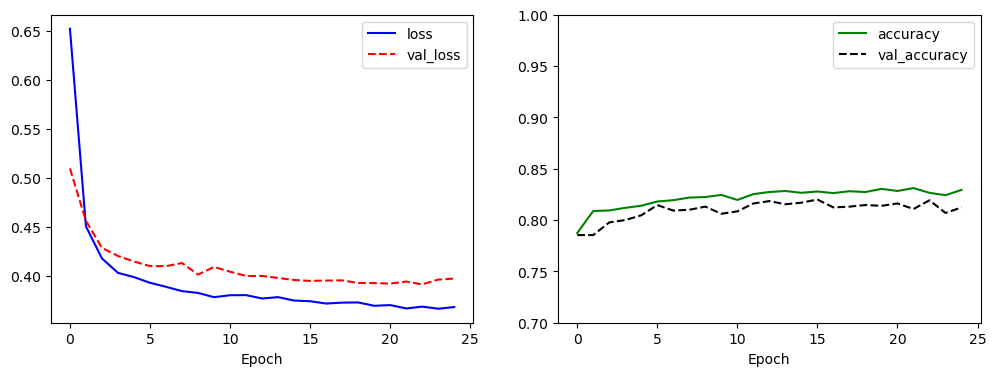

In [73]:
# [확인] 다항 분류 모델 학습 결과 시각화
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r--', label='val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label='accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label='val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()



In [83]:
print(train_X[100])

[0.26446281 0.18       0.14457831 0.01993865 0.05149502 0.06944444
 0.31797235 0.10005784 0.48837209 0.08988764 0.43478261 0.        ]


In [75]:
# (5) 다항 분류 모델 평가


model.evaluate(test_X, test_Y)




# 이번에 테스트 데이트로 평가한 정확도와 위에서 검증 데이타의 정확도 80% 와 비교한다.
# 물론 여기서 더 좋은 성과를 내기 위해 다방면으로 노력해야 한다

41/41 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8397 - loss: 0.3806 


[0.3858286440372467, 0.8361538648605347]